R² Score: nan
MSE: 6275836307.33623


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


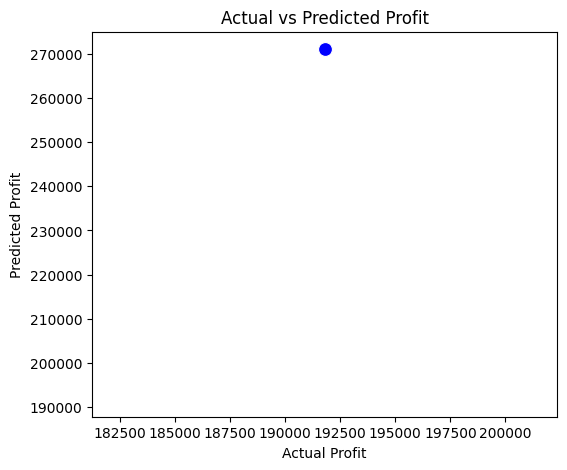


--- Startup Profit Prediction ---

Predicted Profit: $645,712.74


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------ DATA ------------------ #
# Load dataset
df = pd.read_csv("50_startups_sample.csv")

# Encode State (categorical → numeric)
le = LabelEncoder()
df["State"] = le.fit_transform(df["State"])

# Features & Target
X = df.drop(columns=["Profit"])
y = df["Profit"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------ MODEL ------------------ #
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# ------------------ EVALUATION ------------------ #
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Scatter plot (actual vs predicted)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=100)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)  # diagonal line
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()

# ------------------ USER INPUT PREDICTION ------------------ #
print("\n--- Startup Profit Prediction ---")

rd = float(input("Enter R&D Spend: "))
admin = float(input("Enter Administration Spend: "))
marketing = float(input("Enter Marketing Spend: "))
state = input(f"Enter State ({', '.join(le.classes_)}): ")

# Convert state to numeric
state_num = le.transform([state])[0]

# Create input DataFrame
user_data = {
    "R&D Spend": rd,
    "Administration": admin,
    "Marketing Spend": marketing,
    "State": state_num
}
user_df = pd.DataFrame([user_data])

# Predict
prediction = model.predict(user_df)[0]
print(f"\nPredicted Profit: ${prediction:,.2f}")


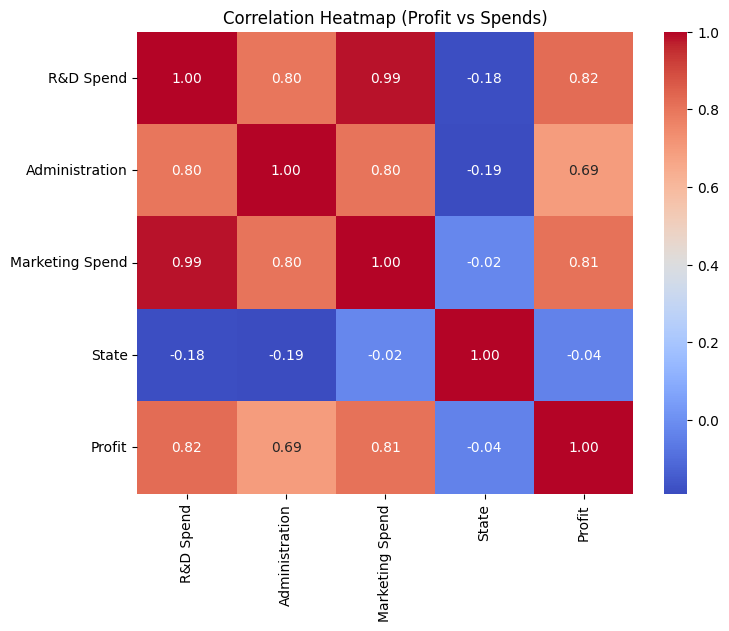

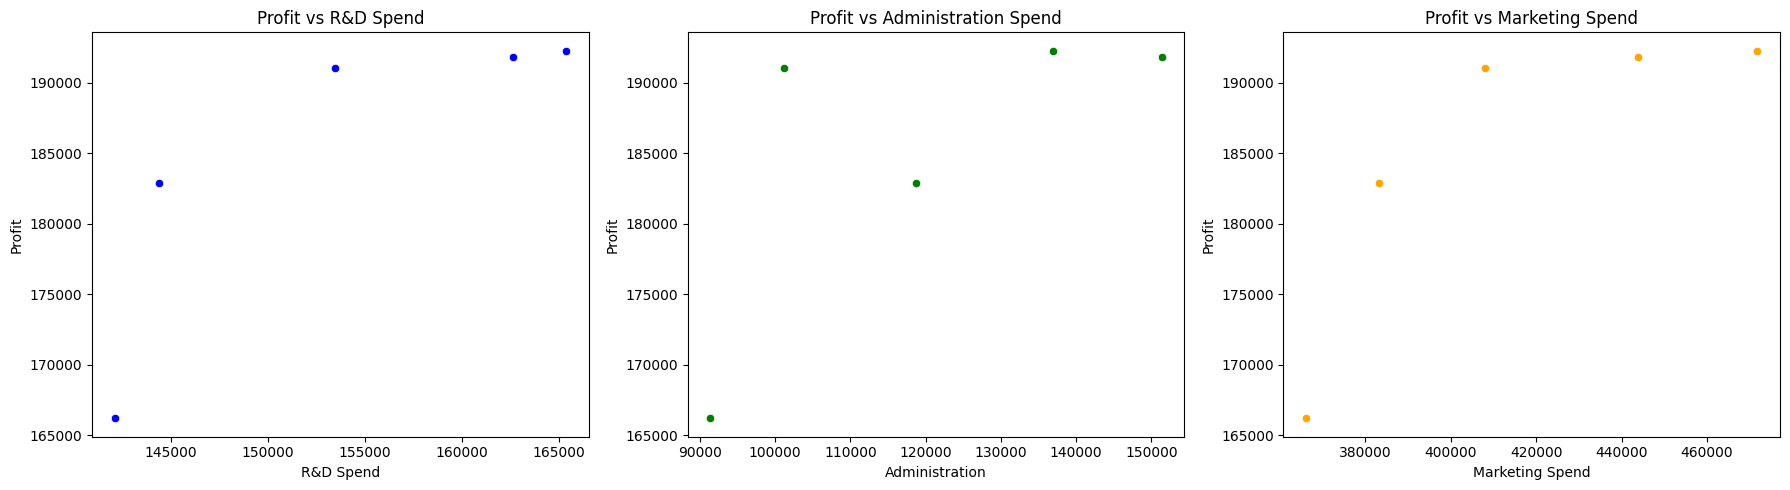

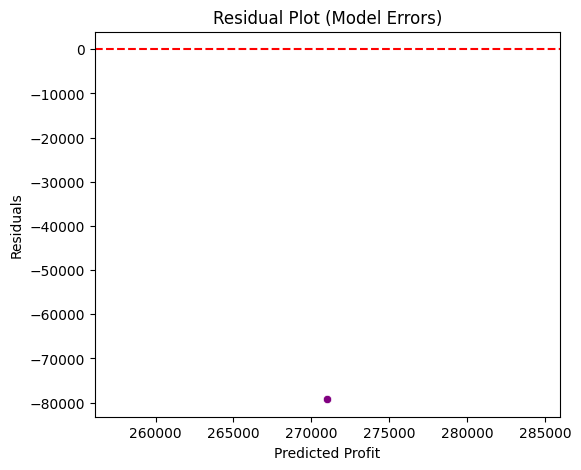

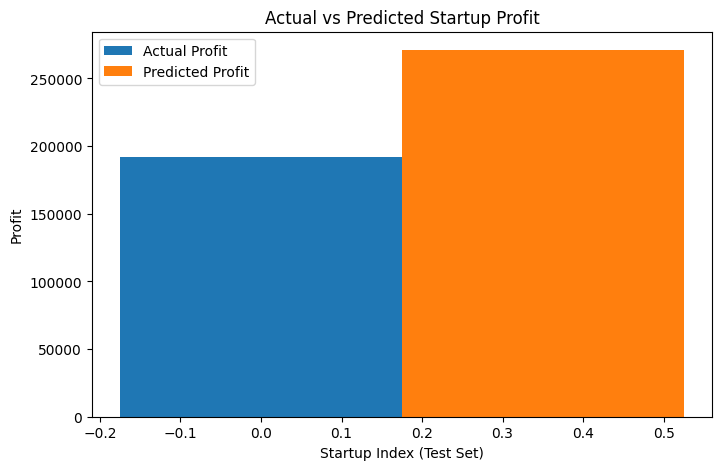

In [6]:
# ------------------ EXTRA VISUALIZATIONS ------------------ #

# 1. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Profit vs Spends)")
plt.show()

# 2. Scatter plots: Profit vs Each Spend
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x="R&D Spend", y="Profit", ax=axes[0], color="blue")
axes[0].set_title("Profit vs R&D Spend")

sns.scatterplot(data=df, x="Administration", y="Profit", ax=axes[1], color="green")
axes[1].set_title("Profit vs Administration Spend")

sns.scatterplot(data=df, x="Marketing Spend", y="Profit", ax=axes[2], color="orange")
axes[2].set_title("Profit vs Marketing Spend")

plt.tight_layout()
plt.show()

# 3. Residual Plot (Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot (Model Errors)")
plt.show()

# 4. Performance Bar Chart (Actual vs Predicted)
plt.figure(figsize=(8, 5))
width = 0.35
indices = np.arange(len(y_test))

plt.bar(indices, y_test, width=width, label="Actual Profit")
plt.bar(indices + width, y_pred, width=width, label="Predicted Profit")

plt.xlabel("Startup Index (Test Set)")
plt.ylabel("Profit")
plt.title("Actual vs Predicted Startup Profit")
plt.legend()
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

# 1. Load dataset
df = pd.read_csv("50_startups_sample.csv")  # use full dataset if available
print(df.head())

# 2. Features & Target
X = df[["R&D Spend", "Administration", "Marketing Spend", "State"]]
y = df["Profit"]

# One-hot encode categorical "State"
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), ["State"])],
)
X = ct.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print("\n Model trained successfully")
print("R² Score:", r2_score(y_test, y_pred))


# 6. User Input Prediction
print("\n--- Startup Profit Prediction ---")
rd = float(input("Enter R&D Spend: "))
admin = float(input("Enter Administration Spend: "))
marketing = float(input("Enter Marketing Spend: "))
state = input("Enter State (New York/California/Florida): ")

# Prepare user input
user_df = pd.DataFrame([[rd, admin, marketing, state]],
                       columns=["R&D Spend", "Administration", "Marketing Spend", "State"])
user_X = ct.transform(user_df)

# Prediction
predicted_profit = model.predict(user_X)[0]
print(f"\nPredicted Profit: ${predicted_profit:,.2f}")

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

 Model trained successfully
R² Score: nan

--- Startup Profit Prediction ---


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Predicted Profit: $187,581.91
